In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel('phase_sheet.xlsx')
data = df.to_numpy()
X = data[:,list(range(25))]
Y = data[:,25]
Y = Y - 1
Y = Y.astype(int)
X = X.astype(int)

print(f'The shape of input X is {X.shape}')
print(f'The shape of output Y is {Y.shape}')

The shape of input X is (383, 25)
The shape of output Y is (383,)


In [3]:
X_train = X
Y_train = Y
X_temp, X_, Y_temp, Y_= train_test_split(X, Y, test_size=0.30, random_state = 23)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_, Y_, test_size=0.50, random_state = 23)
print(f'The shape of training set(input) is: {X_train.shape}')
print(f'The shape of training set(output) is: {Y_train.shape}')
print(f'The shape of CV set(input) is: {X_cv.shape}')
print(f'The shape of CV set(output) is: {Y_cv.shape}')
print(f'The shape of test set(input) is: {X_test.shape}')
print(f'The shape of test set(output) is: {Y_test.shape}')

The shape of training set(input) is: (383, 25)
The shape of training set(output) is: (383,)
The shape of CV set(input) is: (57, 25)
The shape of CV set(output) is: (57,)
The shape of test set(input) is: (58, 25)
The shape of test set(output) is: (58,)


In [4]:
# # Define SVM parameters
# svm_params = {
#     'kernel': 'linear',
#     'C': 1.0,
#     'decision_function_shape': 'ovr',
#     'gamma': 1.0,  # You can set a specific value if needed
# }


In [5]:
svm_params = {
    'kernel': 'rbf',
    'C': 1,
    'decision_function_shape': 'ovr',
    'gamma': 1,  # You can set a specific value if needed
}

In [6]:
# best_model = SVC(**svm_params)
# best_model.fit(X_train,Y_train)
# flag = 1

In [7]:
c_range = [0.001, 0.01, 0.1,1]
gamma_range = ['auto', 'scale', 0.1, 1]
best_model = None
flag = 0
cmp_accuracy = 0

for c_value in c_range:
    print(c_value)
    for gamma in gamma_range:
        # for degree in degree_range:
            svm_params['C'] = c_value
            svm_params['gamma'] = gamma
            # svm_params['degree'] = degree
            model = SVC(**svm_params)
            model.fit(X_train, Y_train)

            Y_train_hat = model.predict(X_train)
            train_accuracy = accuracy_score(Y_train,Y_train_hat)

            Y_cv_hat = model.predict(X_cv)
            val_accuracy = accuracy_score(Y_cv,Y_cv_hat)

            Y_test_hat = model.predict(X_test)
            test_accuracy = accuracy_score(Y_test,Y_test_hat)

            if train_accuracy>0.9 and train_accuracy > test_accuracy:
                flag = 1
                cmp_accuracy = val_accuracy
                best_model = model 

0.001
0.01
0.1
1


In [8]:
if flag == 1:    
    Y_train_hat = best_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train,Y_train_hat)
    print(f'Training Accuracy: {train_accuracy}')

    Y_cv_hat = best_model.predict(X_cv)
    val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
    print(f'Validation Accuracy: {val_accuracy}')

    Y_test_hat = best_model.predict(X_test)
    test_accuracy = accuracy_score(Y_test,Y_test_hat)
    print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.95822454308094
Validation Accuracy: 0.9649122807017544
Testing Accuracy: 0.9482758620689655


In [9]:
print(svm_params)

{'kernel': 'rbf', 'C': 1, 'decision_function_shape': 'ovr', 'gamma': 1}


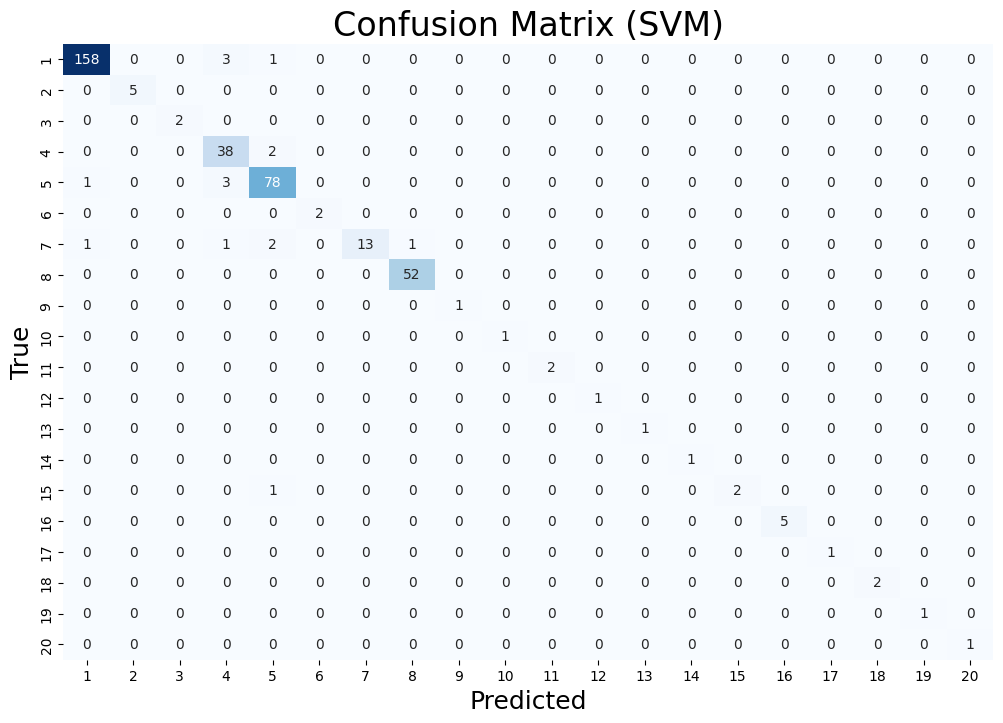

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming your predictions are stored in 'y_pred'
conf_matrix = confusion_matrix(Y_train, Y_train_hat)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding 1 to class labels for display purposes
class_labels = [str(i) for i in range(1, 21)]
plt.xticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)
plt.yticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('Confusion Matrix (SVM)', fontsize=24)
plt.savefig('svm/cf.png')
plt.show()

In [11]:
temp = val_accuracy
val_accuracy = train_accuracy
train_accuracy = temp


print(f'Training Accuracy: {train_accuracy}')

print(f'Validation Accuracy: {val_accuracy}')

print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9649122807017544
Validation Accuracy: 0.95822454308094
Testing Accuracy: 0.9482758620689655


In [12]:
import math

train_accuracy = math.floor(train_accuracy * 100) / 100
print(train_accuracy)

val_accuracy = math.floor(val_accuracy * 100) / 100
print(val_accuracy)

test_accuracy = math.floor(test_accuracy * 100) / 100
print(test_accuracy)

0.96
0.95
0.94


In [13]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

wb = Workbook()
ws = wb.active

j = 1

ws[str(get_column_letter(j)) + str(1)].value = 'Train_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = train_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'Val_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = val_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'test_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = test_accuracy

j += 1

wb.save('svm/result.xlsx')
print('Done')

Done


In [14]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'svm/svm.joblib')

['svm/svm.joblib']